## VaR Historical Method, Example

We will use yfinance library to download historical stock price data and then calculate VaR.

In this practice exercise we consider an equally weighted portfolio (it can be changed).

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

1 -  Set time range.
 - This is optional, we can set a specific time range here or in the data download code.

In [18]:
years = 3

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)


2 - Set the Weights (equally weighted portfolio). And the Portfolio Value ($1,000,000)

In [19]:
portfolio_value = 1000000

# Code for a non-equally weighted portfolio: weights = np.array([0.25, 0.25, 0.2, 0.15, 0.15 ])
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


3 - Create a list of tickers

In [1]:
tickers = ["AAPL", "NVDA", "GOOG", "TSLA", "AMZN"]

4 - Download daily adjusted close price for the tickers

- We use AdjClosePrices instead of ClosePrice due to the dividend and split adjustments.

In [20]:
#Method 1
#adj_close_df = pd.DataFrame()
#for ticker in tickers:
#    data = yf.download(ticker, start=startDate, end=endDate)
#    adj_close_df[ticker] = data['Adj Close']
#print(adj_close_df)

#Method 2 (less code, same result)
#close_df = yf.download(tickers, start="2020-11-01", end="2023-11-05")["Close"]   #We can set a specific time range here
adj_close_df = yf.download(tickers, start=startDate, end=endDate)["Adj Close"]
adj_close_df.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,GOOG,NVDA,TSLA
Date,,,,,
2021-01-20,129.738693,163.169006,94.345001,133.356949,283.483337
2021-01-21,134.494705,165.349503,94.562500,138.363159,281.663330
2021-01-22,136.656525,164.611496,95.052498,136.816635,282.213318
2021-01-25,140.439697,164.699997,94.970001,136.225479,293.600006
2021-01-26,140.675537,166.306503,95.862000,134.050369,294.363342


5 - Calculate the daily log returns and drop any N/A value

In [21]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                AAPL      AMZN      GOOG      NVDA      TSLA
Date                                                        
2021-01-21  0.036002  0.013275  0.002303  0.036852 -0.006441
2021-01-22  0.015946 -0.004473  0.005168 -0.011240  0.001951
2021-01-25  0.027308  0.000537 -0.000868 -0.004330  0.039555
2021-01-26  0.001678  0.009707  0.009349 -0.016096  0.002597
2021-01-27 -0.007714 -0.028529 -0.046139 -0.039279 -0.021669
...              ...       ...       ...       ...       ...
2024-01-12  0.001777 -0.003615  0.003960 -0.002045 -0.037349
2024-01-16 -0.012394 -0.009487 -0.001110  0.030104  0.004649
2024-01-17 -0.005187 -0.009512 -0.008294 -0.005852 -0.020025
2024-01-18  0.032052  0.011730  0.014590  0.018629 -0.017173
2024-01-19  0.015414  0.011916  0.020345  0.040898  0.001462

[754 rows x 5 columns]


6 - Calculating Historical Portfolio Returns

- Sum(Returns * weight)  of every stock

In [8]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2021-01-21    0.016398
2021-01-22    0.001470
2021-01-25    0.012440
2021-01-26    0.001447
2021-01-27   -0.028666
                ...   
2024-01-12   -0.007455
2024-01-16    0.002352
2024-01-17   -0.009774
2024-01-18    0.011965
2024-01-19    0.018007
Length: 754, dtype: float64


7 - Finding N-Day Historical Returns

In [9]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2021-04-01   -0.038823
2021-04-05   -0.027201
2021-04-06   -0.030077
2021-04-07   -0.036244
2021-04-08   -0.025047
                ...   
2024-01-12    0.151406
2024-01-16    0.128483
2024-01-17    0.093854
2024-01-18    0.095229
2024-01-19    0.104388
Length: 705, dtype: float64


### Calculating VaR Using the Historical Method

Set the confidence level (99%) and calculate the Value at Risk (VaR)

- Rememeber the higher we set our confidence interval & days; the greater our VaR is

In [14]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

print('-' * 40)
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)
print(f'{confidence_interval * 100:>6.0f}%: {"":<11} ${VaR:>10,.6f}')

322752.2906910208
----------------------------------------
Confidence Level     Value at Risk       
----------------------------------------
    99%:             $322,752.290691



Plotting the Results of the Historical Returns

Finally, let’s plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.


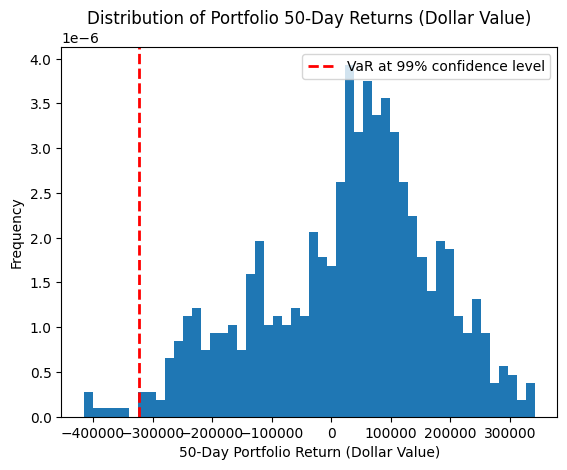

In [15]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()